# PROJECT DESCRIPTION
Megaline Operator offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

I carried out a preliminary analysis of the plans based on a relatively small client selection. I have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. My job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

#### OPEN THE DATA FILE AND STUDY THE GENERAL INFORMATION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

megaline_calls = pd.read_csv('/datasets/megaline_calls.csv')
megaline_internet = pd.read_csv('/datasets/megaline_internet.csv')
megaline_messages = pd.read_csv('/datasets/megaline_messages.csv')
megaline_plans = pd.read_csv('/datasets/megaline_plans.csv')
megaline_users1 = pd.read_csv('/datasets/megaline_users1.csv')

In [3]:
megaline_calls.info()
megaline_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
megaline_internet.info()
megaline_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [5]:
megaline_messages.info()
megaline_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [6]:
megaline_plans.info()
megaline_plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [7]:
megaline_users1.info()
megaline_users1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


#### PREPARE THE DATA

In [8]:
#Converting data types to the necessary types
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'], format='%Y-%m-%d')
megaline_internet['internet'] = pd.to_datetime(megaline_internet['session_date'], format='%Y-%m-%d')
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'],format='%Y-%m-%d')
megaline_users1['reg_date'] = pd.to_datetime(megaline_users1['reg_date'],format='%Y-%m-%d')
megaline_users1['churn_date'] = pd.to_datetime(megaline_users1['churn_date'],format='%Y-%m-%d')

In [9]:
#Checking for datatype changes
megaline_calls.info()
megaline_internet.info()
megaline_messages.info()
megaline_users1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
internet        104825 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1

In [10]:
#adding month columns to get the numbe rof calls made and minutes used per month, the number of text messages sent per month, the volume of data per month
megaline_calls['month'] = pd.DatetimeIndex(megaline_calls['call_date']).month
megaline_messages['month'] = pd.DatetimeIndex(megaline_messages['message_date']).month
megaline_internet['month'] = pd.DatetimeIndex(megaline_internet['session_date']).month

In [11]:
#The number of calls made and minutes used per month
no_calls_month = megaline_calls.pivot_table(index=['month', 'user_id'],values='duration',aggfunc=['count', 'sum']).reset_index().sort_values(['user_id'],ascending=True)
no_calls_month.columns = ['month', 'user_id', 'call_count', 'call_duration']
no_calls_month.head()

,month,user_id,call_count,call_duration
1798,12,1000,16,116.83
1058,10,1001,65,374.11
1395,11,1001,64,404.59
551,8,1001,27,171.14
1799,12,1001,56,392.93


In [12]:
#The number of text messages sent per month
no_messages_month = megaline_messages.pivot_table(index=['month', 'user_id'], values='id', aggfunc='count').reset_index().sort_values(['user_id'], ascending = True)
no_messages_month.columns = ['month', 'user_id', 'message_count']
no_messages_month.head()

,month,user_id,message_count
1426,12,1000,11
597,9,1001,44
1097,11,1001,36
416,8,1001,30
1427,12,1001,44


In [13]:
#The volume of data per month
volume_internet_month = megaline_internet.pivot_table(index=['month', 'user_id'], values='mb_used', aggfunc='sum').reset_index().sort_values(['user_id'], ascending = True)
volume_internet_month.columns = ['month', 'user_id', 'mb_used']
volume_internet_month.head()

,month,user_id,mb_used
1809,12,1000,1901.47
553,8,1001,6919.15
1062,10,1001,22330.49
1401,11,1001,18504.30
783,9,1001,13314.82


In [14]:
# Merging table of all users and their data summaries
data = megaline_users1[['user_id', 'tariff', 'reg_date', 'churn_date', 'city']].merge(no_messages_month, on=['user_id'])
data_calls = megaline_users1[['user_id', 'tariff', 'reg_date', 'churn_date', 'city']].merge(no_calls_month, on=['user_id'])
data_internet = megaline_users1[['user_id', 'tariff', 'reg_date', 'churn_date', 'city']].merge(volume_internet_month, on=['user_id'])
data = data.merge(data_calls, on=['user_id', 'month', 'tariff', 'reg_date', 'churn_date', 'city'], how="outer")
data = data.merge(data_internet, on=['user_id', 'month', 'tariff', 'reg_date', 'churn_date', 'city'], how="outer")
data.head()
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 10 columns):
user_id          2293 non-null int64
tariff           2293 non-null object
reg_date         2293 non-null datetime64[ns]
churn_date       158 non-null datetime64[ns]
city             2293 non-null object
month            2293 non-null int64
message_count    1806 non-null float64
call_count       2258 non-null float64
call_duration    2258 non-null float64
mb_used          2277 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(2), object(2)
memory usage: 197.1+ KB


user_id             0
tariff              0
reg_date            0
churn_date       2135
city                0
month               0
message_count     487
call_count         35
call_duration      35
mb_used            16
dtype: int64

In [15]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 10 columns):
user_id          2293 non-null int64
tariff           2293 non-null object
reg_date         2293 non-null datetime64[ns]
churn_date       158 non-null datetime64[ns]
city             2293 non-null object
month            2293 non-null int64
message_count    1806 non-null float64
call_count       2258 non-null float64
call_duration    2258 non-null float64
mb_used          2277 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(2), object(2)
memory usage: 197.1+ KB


,user_id,tariff,reg_date,churn_date,city,month,message_count,call_count,call_duration,mb_used
0,1000,ultimate,2018-12-24,NaT,"Atlanta-Sandy Springs-Roswell, GA MSA",12,11.0,16.0,116.83,1901.47
1,1001,surf,2018-08-13,NaT,"Seattle-Tacoma-Bellevue, WA MSA",9,44.0,49.0,297.69,13314.82
2,1001,surf,2018-08-13,NaT,"Seattle-Tacoma-Bellevue, WA MSA",11,36.0,64.0,404.59,18504.30
3,1001,surf,2018-08-13,NaT,"Seattle-Tacoma-Bellevue, WA MSA",8,30.0,27.0,171.14,6919.15
4,1001,surf,2018-08-13,NaT,"Seattle-Tacoma-Bellevue, WA MSA",12,44.0,56.0,392.93,19369.18


In [16]:
# Changing call_count and messages_count columns to integers
data.loc[data['call_count'].isnull(), 'call_count'] = 0
data['call_count'] = data['call_count'].astype('int')
 
data.loc[data['message_count'].isnull(), 'message_count'] = 0
data['message_count'] = data['message_count'].astype('int')

In [17]:
# Creating a new column data['gb_used'] from data['mb_used'] column.
data['gb_used'] = np.ceil(data['mb_used']/1024)
data.loc[data['gb_used'].isnull(), 'gb_used'] = 0

# Rouncing and changing gb_used column to integers.
data['gb_used'] = data['gb_used'].astype('int')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 11 columns):
user_id          2293 non-null int64
tariff           2293 non-null object
reg_date         2293 non-null datetime64[ns]
churn_date       158 non-null datetime64[ns]
city             2293 non-null object
month            2293 non-null int64
message_count    2293 non-null int64
call_count       2293 non-null int64
call_duration    2258 non-null float64
mb_used          2277 non-null float64
gb_used          2293 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(5), object(2)
memory usage: 215.0+ KB


,user_id,tariff,reg_date,churn_date,city,month,message_count,call_count,call_duration,mb_used,gb_used
0,1000,ultimate,2018-12-24,NaT,"Atlanta-Sandy Springs-Roswell, GA MSA",12,11,16,116.83,1901.47,2
1,1001,surf,2018-08-13,NaT,"Seattle-Tacoma-Bellevue, WA MSA",9,44,49,297.69,13314.82,14
2,1001,surf,2018-08-13,NaT,"Seattle-Tacoma-Bellevue, WA MSA",11,36,64,404.59,18504.30,19
3,1001,surf,2018-08-13,NaT,"Seattle-Tacoma-Bellevue, WA MSA",8,30,27,171.14,6919.15,7
4,1001,surf,2018-08-13,NaT,"Seattle-Tacoma-Bellevue, WA MSA",12,44,56,392.93,19369.18,19


In [18]:
#The monthly revenue from each user
surf_monthly_charge = 20
surf_monthly_minutes = 500
surf_monthly_texts = 50
surf_monthly_data = 15
surf_minute_charge = 0.03
surf_message_charge = 0.03
surf_data_charge = 10
 
ultimate_monthly_charge = 70
ultimate_monthly_minutes = 3000
ultimate_monthly_texts = 1000
ultimate_monthly_data = 30
ultimate_minute_charge = 0.01
ultimate_message_charge = 0.01
ultimate_data_charge = 7
 
def revenue_calc(row):
    if row['tariff'] == 'surf':
        row_revenue = [surf_monthly_charge]
        if row['call_duration'] > surf_monthly_minutes:
            row_revenue.append(surf_minute_charge * (row['call_duration'] - surf_monthly_minutes))
        if row['message_count'] > surf_monthly_texts:
            row_revenue.append(surf_message_charge * (row['message_count'] - surf_monthly_texts))
        if row['gb_used'] > surf_monthly_data:
            row_revenue.append(surf_data_charge * (row['gb_used'] - surf_monthly_data))
        return sum(row_revenue)
    if row['tariff'] == 'ultimate':
        row_revenue = [ultimate_monthly_charge]
        if row['call_duration'] > ultimate_monthly_minutes:
            row_revenue.append(ultimate_minute_charge * (row['call_duration'] - ultimate_monthly_minutes))
        if row['message_count'] > ultimate_monthly_texts:
            row_revenue.append(ultimate_message_charge * (row['message_count'] - ultimate_monthly_texts))
        if row['gb_used'] > ultimate_monthly_data:
            row_revenue.append(ultimate_data_charge * (row['gb_used'] - ultimate_monthly_data)) 
        return sum(row_revenue)

data['revenue'] = data.apply(revenue_calc, axis=1)
data.head()

,user_id,tariff,reg_date,churn_date,city,month,message_count,call_count,call_duration,mb_used,gb_used,revenue
0,1000,ultimate,2018-12-24,NaT,"Atlanta-Sandy Springs-Roswell, GA MSA",12,11,16,116.83,1901.47,2,70.0
1,1001,surf,2018-08-13,NaT,"Seattle-Tacoma-Bellevue, WA MSA",9,44,49,297.69,13314.82,14,20.0
2,1001,surf,2018-08-13,NaT,"Seattle-Tacoma-Bellevue, WA MSA",11,36,64,404.59,18504.30,19,60.0
3,1001,surf,2018-08-13,NaT,"Seattle-Tacoma-Bellevue, WA MSA",8,30,27,171.14,6919.15,7,20.0
4,1001,surf,2018-08-13,NaT,"Seattle-Tacoma-Bellevue, WA MSA",12,44,56,392.93,19369.18,19,60.0


In [19]:
data.groupby('tariff')['revenue'].sum()

tariff
surf        94894.9156
ultimate    52066.0000
Name: revenue, dtype: float64

#### Analyze the data

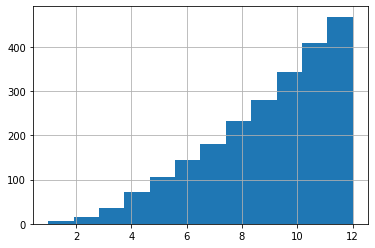

In [20]:
# Showing number of subscribers per month
data['month'].hist(bins=12)

In [21]:
# Using describe() to get the internet usage per month and per tarriff
data.groupby(['tariff', 'month'])['mb_used'].describe()

count          mean           std      min         25%  \
tariff   month                                                           
surf     1        2.0   4874.860000   4270.825963  1854.93   3364.8950   
         2        9.0  12178.843333   6608.551952   599.78   7045.4400   
         3       23.0  13345.440000   8261.086946  1248.03   6152.9900   
         4       49.0  12228.778571   7564.514094    92.31   6759.6600   
         5       76.0  14119.728026   7724.799075   129.84   7462.8825   
         6       95.0  15623.666632   6715.077831  1021.33  12559.7750   
         7      120.0  16923.463917   7927.374698   113.74  13013.4575   
         8      159.0  17112.224403   8402.176549   618.95  12051.2850   
         9      193.0  16677.397254   7081.155848   409.43  12566.1200   
         10     234.0  17533.275256   7708.760082   633.04  12603.5200   
         11     281.0  16455.548043   7460.787843   240.00  12247.5000   
         12     317.0  18189.669590   8445.826008    92.68  13833.4000   
ultimate 1        4.0   6918.092500   4049.038391  1315.35   5438.4150   
         2        7.0  17128.808571   6135.885948  4975.19  16259.2300   
         3       12.0  18321.518333  11846.483246  1586.39   7938.8075   
         4       21.0  16121.654762   9403.648604  2947.77   8196.0300   
         5       29.0  16624.482414   7535.921701  2292.12  13675.9500   
         6       47.0  15337.921064   8486.137619  1449.37  10392.7250   
         7       59.0  16344.744407   8271.590578   522.18  11823.1150   
         8       71.0  17814.720141   7774.772263   630.23  14120.0900   
         9       86.0  16969.869535   7024.175271  3818.35  12743.7425   
         10     105.0  17780.292000   7384.591368  3465.51  12730.1300   
         11     127.0  17033.685354   7588.773139   290.06  12855.8900   
         12     151.0  18323.191854   7866.466882   233.17  13781.4750   

                      50%         75%       max  
tariff   month                                   
surf     1       4874.860   6384.8250   7894.79  
         2      11828.250  16319.1500  20389.87  
         3      13867.940  18749.9650  30347.76  
         4      11963.560  18087.2200  28509.80  
         5      13986.490  20333.1125  36672.29  
         6      15487.230  18583.2800  37102.77  
         7      16964.020  21525.1450  38929.09  
         8      17008.200  21308.4500  51809.35  
         9      16978.890  20991.8900  37298.02  
         10     17517.820  21286.5200  46868.75  
         11     16862.030  20535.2000  42866.10  
         12     17784.340  21917.3500  70931.59  
ultimate 1       7860.690   9340.3675  10635.64  
         2      20085.200  20361.9300  21598.95  
         3      20812.505  28632.8675  36061.04  
         4      15651.160  20601.5800  37761.59  
         5      16499.790  20773.1200  32907.83  
         6      15342.760  20239.9400  37907.14  
         7      15068.780  20992.7800  38826.70  
         8      17954.650  20947.7900  40388.21  
         9      16434.410  19946.0525  37587.03  
         10     16992.860  21104.0200  46595.33  
         11     17130.900  20700.8600  42952.59  
         12     17346.080  22219.8100  46215.51

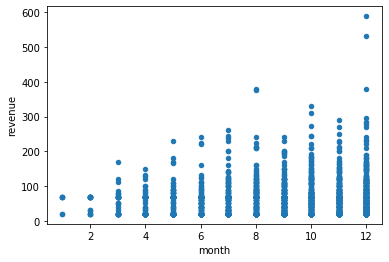

In [22]:
# Showing revenue per month
data.plot(x='month', y='revenue', kind='scatter')

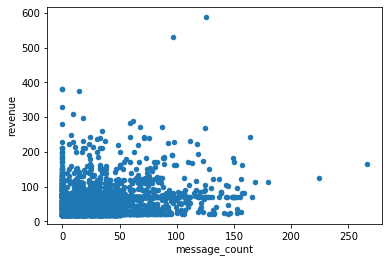

In [23]:
# Showing message_count against revenue
data.plot(x='message_count', y='revenue', kind='scatter')

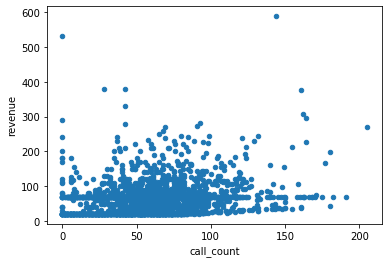

In [24]:
# Showing call_count against revenue
data.plot(x='call_count', y='revenue', kind='scatter')

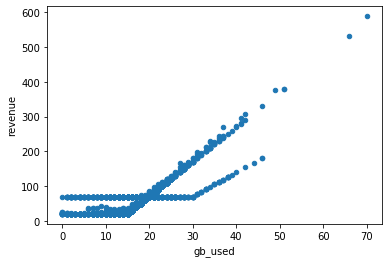

In [26]:
# Showing volume of data against revenue
data.plot(x='gb_used', y='revenue', kind='scatter')

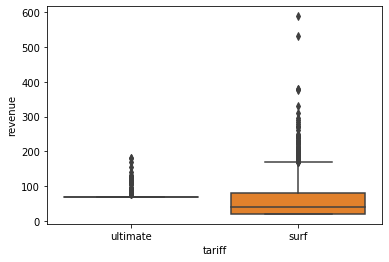

In [29]:
sns.boxplot(data = data,y = 'revenue', x = 'tariff')

##### DESCRIBING CUSTOMER'S BEHAVIOR

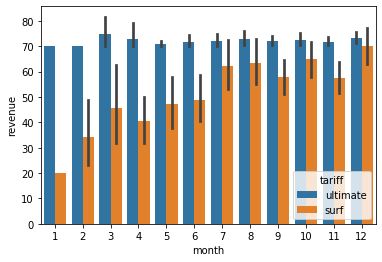

In [30]:
# Showing what month has the most revenue
sns.barplot(data = data, x = 'month', y = 'revenue', hue = 'tariff')

([<matplotlib.patches.Wedge at 0x7f9412ffb990>,
 [Text(-0.6068130044896332, 0.9174845925585151, 'surf'),
  Text(0.606813004489633, -0.9174845925585152, 'ultimate')],
 [Text(-0.33098891153979987, 0.5004461413955537, '68.6%'),
  Text(0.3309889115397998, -0.5004461413955538, '31.4%')])

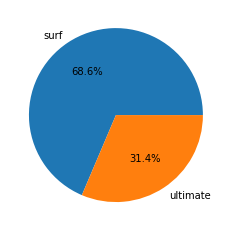

In [31]:
# Showing the number of users for each tariff
data['tariff'].value_counts()
plt.pie([1573, 720], labels = ['surf', 'ultimate'], autopct='%1.1f%%')

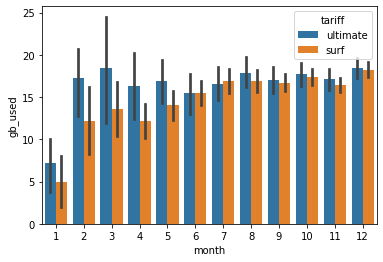

In [32]:
# Showing month on month usage of internet for each tariff
sns.barplot(data = data, x = 'month', y = 'gb_used', hue = 'tariff')

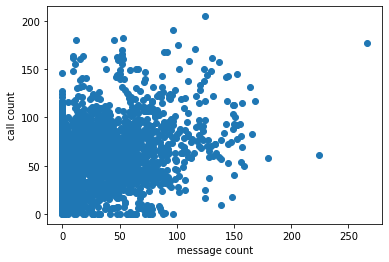

In [33]:
plt.xlabel('message count')
plt.ylabel('call count')
plt.scatter(data.message_count, data.call_count)

In [35]:
# Showing/ describing internet used per month for each tariff
data.groupby(['tariff', 'month'])['mb_used'].describe()

count          mean           std      min         25%  \
tariff   month                                                           
surf     1        2.0   4874.860000   4270.825963  1854.93   3364.8950   
         2        9.0  12178.843333   6608.551952   599.78   7045.4400   
         3       23.0  13345.440000   8261.086946  1248.03   6152.9900   
         4       49.0  12228.778571   7564.514094    92.31   6759.6600   
         5       76.0  14119.728026   7724.799075   129.84   7462.8825   
         6       95.0  15623.666632   6715.077831  1021.33  12559.7750   
         7      120.0  16923.463917   7927.374698   113.74  13013.4575   
         8      159.0  17112.224403   8402.176549   618.95  12051.2850   
         9      193.0  16677.397254   7081.155848   409.43  12566.1200   
         10     234.0  17533.275256   7708.760082   633.04  12603.5200   
         11     281.0  16455.548043   7460.787843   240.00  12247.5000   
         12     317.0  18189.669590   8445.826008    92.68  13833.4000   
ultimate 1        4.0   6918.092500   4049.038391  1315.35   5438.4150   
         2        7.0  17128.808571   6135.885948  4975.19  16259.2300   
         3       12.0  18321.518333  11846.483246  1586.39   7938.8075   
         4       21.0  16121.654762   9403.648604  2947.77   8196.0300   
         5       29.0  16624.482414   7535.921701  2292.12  13675.9500   
         6       47.0  15337.921064   8486.137619  1449.37  10392.7250   
         7       59.0  16344.744407   8271.590578   522.18  11823.1150   
         8       71.0  17814.720141   7774.772263   630.23  14120.0900   
         9       86.0  16969.869535   7024.175271  3818.35  12743.7425   
         10     105.0  17780.292000   7384.591368  3465.51  12730.1300   
         11     127.0  17033.685354   7588.773139   290.06  12855.8900   
         12     151.0  18323.191854   7866.466882   233.17  13781.4750   

                      50%         75%       max  
tariff   month                                   
surf     1       4874.860   6384.8250   7894.79  
         2      11828.250  16319.1500  20389.87  
         3      13867.940  18749.9650  30347.76  
         4      11963.560  18087.2200  28509.80  
         5      13986.490  20333.1125  36672.29  
         6      15487.230  18583.2800  37102.77  
         7      16964.020  21525.1450  38929.09  
         8      17008.200  21308.4500  51809.35  
         9      16978.890  20991.8900  37298.02  
         10     17517.820  21286.5200  46868.75  
         11     16862.030  20535.2000  42866.10  
         12     17784.340  21917.3500  70931.59  
ultimate 1       7860.690   9340.3675  10635.64  
         2      20085.200  20361.9300  21598.95  
         3      20812.505  28632.8675  36061.04  
         4      15651.160  20601.5800  37761.59  
         5      16499.790  20773.1200  32907.83  
         6      15342.760  20239.9400  37907.14  
         7      15068.780  20992.7800  38826.70  
         8      17954.650  20947.7900  40388.21  
         9      16434.410  19946.0525  37587.03  
         10     16992.860  21104.0200  46595.33  
         11     17130.900  20700.8600  42952.59  
         12     17346.080  22219.8100  46215.51

In [36]:
# Showing/ describing messages count per month for each tariff
data.groupby(['tariff', 'month'])['message_count'].describe()

count       mean        std  min    25%   50%    75%    max
tariff   month                                                             
surf     1        2.0  10.500000  14.849242  0.0   5.25  10.5  15.75   21.0
         2        9.0  12.000000  19.646883  0.0   0.00   3.0  11.00   58.0
         3       23.0  15.260870  18.616262  0.0   0.00   7.0  25.00   59.0
         4       50.0  17.400000  22.396246  0.0   0.00  10.0  27.75  120.0
         5       77.0  24.012987  29.106652  0.0   0.00  15.0  37.00  149.0
         6       97.0  25.298969  30.247646  0.0   1.00  15.0  36.00  133.0
         7      121.0  27.033058  30.395979  0.0   1.00  20.0  41.00  164.0
         8      162.0  28.777778  32.086064  0.0   2.00  20.0  43.00  156.0
         9      194.0  30.762887  31.683268  0.0   4.00  22.5  48.00  153.0
         10     237.0  33.839662  35.713663  0.0   4.00  26.0  51.00  224.0
         11     283.0  32.385159  32.639608  0.0   4.00  27.0  47.00  180.0
         12     318.0  38.600629  38.185843  0.0   9.00  31.0  57.00  266.0
ultimate 1        4.0  15.500000  17.710637  0.0   1.50  12.5  26.50   37.0
         2        7.0  21.571429  21.869744  0.0  10.00  15.0  24.50   67.0
         3       12.0  20.250000  25.580977  0.0   0.00  12.0  28.00   72.0
         4       21.0  22.047619  23.326972  0.0   5.00  17.0  28.00   77.0
         5       29.0  32.103448  36.018195  0.0   0.00  19.0  60.00  149.0
         6       47.0  29.340426  29.285162  0.0   4.50  21.0  46.50  143.0
         7       59.0  32.830508  30.991741  0.0   4.50  28.0  52.50  149.0
         8       71.0  38.478873  34.588544  0.0   6.00  36.0  64.50  151.0
         9       86.0  37.895349  32.417871  0.0   7.25  31.5  61.00  155.0
         10     106.0  39.443396  34.944331  0.0   8.00  35.0  57.75  153.0
         11     127.0  38.606299  35.109389  0.0   8.50  32.0  63.00  166.0
         12     151.0  45.006623  39.362672  0.0   9.50  41.0  72.00  150.0

In [37]:
# Showing/ describing call duration for each tariff per month
data.groupby(['tariff', 'month'])['call_duration'].describe()

count        mean         std     min       25%      50%  \
tariff   month                                                             
surf     1        2.0  192.840000  121.636508  106.83  149.8350  192.840   
         2        9.0  280.851111  216.700761   36.82  231.8700  240.660   
         3       23.0  310.970000  178.385308   33.43  217.7350  312.790   
         4       50.0  332.380000  213.578245   15.69  171.1125  320.120   
         5       75.0  387.108000  225.340026   15.14  205.2100  409.060   
         6       96.0  411.450625  198.554914   12.50  285.0800  407.630   
         7      120.0  428.060917  231.007663   16.06  288.1375  431.235   
         8      159.0  394.474717  215.961202    3.90  247.9750  372.560   
         9      191.0  397.133298  199.462535    1.20  252.2950  403.340   
         10     232.0  414.435733  210.008766    0.00  267.2450  410.350   
         11     277.0  408.255415  208.712422    4.60  260.7900  395.180   
         12     311.0  457.547074  231.617750   16.28  310.5350  429.190   
ultimate 1        4.0  183.162500  122.439250   14.73  131.4000  221.425   
         2        6.0  443.171667  220.407762   86.04  375.1700  443.550   
         3       12.0  285.701667  232.967631   20.63   76.3475  236.390   
         4       21.0  316.508095  176.232027   49.41  205.7100  283.540   
         5       29.0  383.664828  198.218594   21.25  250.6000  385.480   
         6       45.0  365.358222  183.950456   43.77  227.0100  377.480   
         7       59.0  403.767288  254.645689   13.95  190.2750  403.420   
         8       71.0  397.274789  218.357939   11.05  235.2600  388.240   
         9       86.0  413.287326  225.819630   16.84  236.3900  410.150   
         10     105.0  429.217238  216.983004   32.56  285.5100  431.840   
         11     126.0  423.814683  230.810826    0.00  277.9750  409.835   
         12     149.0  438.824832  232.309560    8.73  268.0500  421.420   

                     75%      max  
tariff   month                     
surf     1      235.8450   278.85  
         2      287.1700   769.02  
         3      376.2800   739.05  
         4      475.4225   991.24  
         5      528.8750   995.63  
         6      525.0300   975.62  
         7      555.6325  1112.88  
         8      532.8650  1043.18  
         9      522.1450  1146.22  
         10     550.1050  1163.31  
         11     551.0700  1234.57  
         12     581.0600  1431.22  
ultimate 1      273.1875   275.07  
         2      558.0850   737.25  
         3      449.4275   663.16  
         4      424.6600   703.19  
         5      449.3600   817.68  
         6      469.0500   755.17  
         7      523.9900  1123.11  
         8      515.0550  1208.60  
         9      529.6175  1159.29  
         10     531.0800  1137.00  
         11     553.5150  1133.59  
         12     560.0800  1292.09

In [39]:
data.head()


,user_id,tariff,reg_date,churn_date,city,month,message_count,call_count,call_duration,mb_used,gb_used,revenue
0,1000,ultimate,2018-12-24,NaT,"Atlanta-Sandy Springs-Roswell, GA MSA",12,11,16,116.83,1901.47,2,70.0
1,1001,surf,2018-08-13,NaT,"Seattle-Tacoma-Bellevue, WA MSA",9,44,49,297.69,13314.82,14,20.0
2,1001,surf,2018-08-13,NaT,"Seattle-Tacoma-Bellevue, WA MSA",11,36,64,404.59,18504.30,19,60.0
3,1001,surf,2018-08-13,NaT,"Seattle-Tacoma-Bellevue, WA MSA",8,30,27,171.14,6919.15,7,20.0
4,1001,surf,2018-08-13,NaT,"Seattle-Tacoma-Bellevue, WA MSA",12,44,56,392.93,19369.18,19,60.0


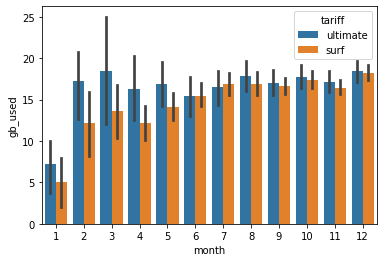

In [43]:
# Showing data usage for each month
sns.barplot(data = data, x = 'month', y = 'gb_used', hue = 'tariff')

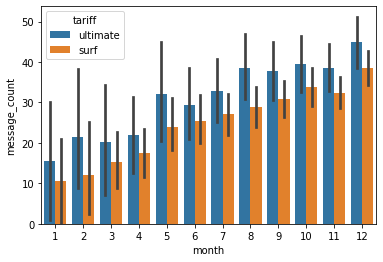

In [41]:
S# Showing messages sent for each month
sns.barplot(data = data, x = 'month', y = 'message_count', hue = 'tariff')

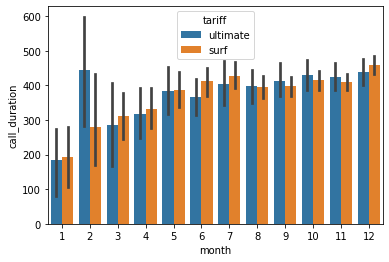

In [42]:
# Showing call duration for each month
sns.barplot(data = data, x = 'month', y = 'call_duration', hue = 'tariff')

#### Test the hypotheses

In [44]:
revenue_surf = data[(data['tariff'] =='surf')]['revenue']
revenue_ultimate = data[(data['tariff'] =='ultimate')]['revenue']

In [50]:
nynj = []
for i in data['city'].to_list():
    if 'NY-NJ' in i:
        nynj.append(i)
        
data_nynj = data[data['city'].isin(nynj)]
data_others = data[~data['city'].isin(nynj)]
data_nynj.shape, data_others.shape

revenue_nynj, revenue_others =  data_nynj['revenue'], data_others['revenue']

###### Testing the hypotheses
Ho : There is no significance difference between the revenue of Surf and Ultimate subscribers

H1: There is a signifcance difference betwwen the revenue of the Surf and Ultimate subscribers

In [47]:
import scipy

stat, p = scipy.stats.ttest_ind(revenue_surf, revenue_ultimate)

level = 0.05
if p < 0.05:
    print('Reject the null hypothesis with {}({})'.format(stat, p))
    
else:
    print("Accept the null hypothesis with {} ({})".format(stat,p))

Reject the null hypothesis with -5.763617291201939(9.342071816297584e-09)


###### Testing the hypothesis
Ho : There is no significance difference between the revenue ofsubscribers that reside in NY-NJ and other cities 
    
H1: There is a significance difference between the revenue of subscribers that reside in NY-NJ and other cities

In [51]:
import scipy

stat, p = scipy.stats.ttest_ind(revenue_nynj, revenue_others)

level = 0.05
if p < 0.05:
    print('Reject the null hypothesis with {}({})'.format(stat, p))
else:
    print("Accept the null hypothesis with {} ({})".format(stat,p))
        

Reject the null hypothesis with -2.0473308492829214(0.040739443627031434)


#### Write an overall conclusion

Surf prepaid plan brings in more revenue because more people use Surf than Ultimate. Ultimate prepaid plan is more expensive and for executive people but due to the multiplier effect of the number of people using Surf that is why it genertaes more revenue.

Also, The best time customers buy more plans is between October and December as this is like festive period and there is a lot to use the plan for.